# Netflix Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\nikhi\OneDrive\Documents\Nikhil Masters files\University of Windsor\Interview prep\Pragra\Data Analytics Bootcamp\Netflix Data Analysis\file.csv")
df.head()               

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Exploring our data

In [3]:
df.shape

(7789, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


We see Director, Cast, Country, Release_Date, and Rating having null values

In [5]:
df.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

# Checking out for duplicates

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7784    False
7785    False
7786    False
7787    False
7788    False
Length: 7789, dtype: bool

In [7]:
df.loc[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


We have 2 records which have duplicate values. Dropping such records

In [8]:
df.drop(index=[6300,6622],inplace=True)

In [9]:
df.shape

(7787, 11)

We see 2 records have been dropped

# Null Values

In [10]:
df.isnull().any()

Show_Id         False
Category        False
Title           False
Director         True
Cast             True
Country          True
Release_Date     True
Rating           True
Duration        False
Type            False
Description     False
dtype: bool

In [11]:
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [12]:
df.isnull()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
7784,False,False,False,False,False,False,False,False,False,False,False
7785,False,False,False,False,False,False,False,False,False,False,False
7786,False,False,False,True,False,True,False,False,False,False,False
7787,False,False,False,True,False,False,False,False,False,False,False


In [13]:
df.isnull().any(axis=1)

0        True
1       False
2       False
3       False
4       False
        ...  
7784    False
7785    False
7786     True
7787     True
7788     True
Length: 7787, dtype: bool

In [14]:
df[df.isnull().any(axis=1)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th..."
...,...,...,...,...,...,...,...,...,...,...,...
7779,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7781,s7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


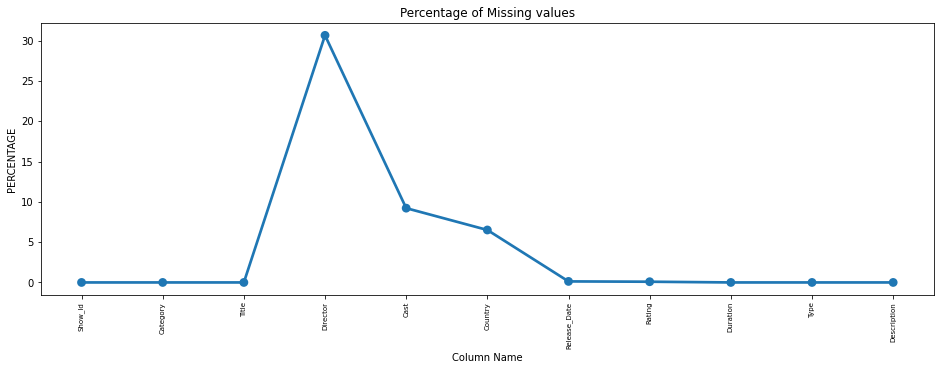

In [15]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
missing.rename(columns={0:"Percentage"},inplace=True)
missing.rename(columns={'index':'Column Name'},inplace=True)
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='Column Name',y='Percentage',data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

From the above graph, we see 'Director' and 'Cast' columns in particular have a significant percentage of missing values. Therefore, it doesn't make sense to deal with these many missing values. Therefore, we go ahead and drop missing values below.

In [16]:
df.dropna(inplace=True)
df.reset_index()

,index,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
1,2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
2,3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
3,4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
4,5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
...,...,...,...,...,...,...,...,...,...,...,...,...
4804,7780,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
4805,7782,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
4806,7783,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
4807,7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...


In [17]:
df.isnull().any()

Show_Id         False
Category        False
Title           False
Director        False
Cast            False
Country         False
Release_Date    False
Rating          False
Duration        False
Type            False
Description     False
dtype: bool

# Converting columns to appropriate data types

In [18]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])

In [19]:
df.dtypes

Show_Id                 object
Category                object
Title                   object
Director                object
Cast                    object
Country                 object
Release_Date    datetime64[ns]
Rating                  object
Duration                object
Type                    object
Description             object
dtype: object

# Insight 1: Finding the year with the highest number of releases

In [20]:
df['Release_Date'].dt.year.value_counts()

2019    1337
2020    1229
2018    1115
2017     752
2016     207
2021      78
2015      50
2014      14
2011      13
2013       7
2012       3
2009       2
2010       1
2008       1
Name: Release_Date, dtype: int64

Text(0.5, 1.0, 'Releases per year')

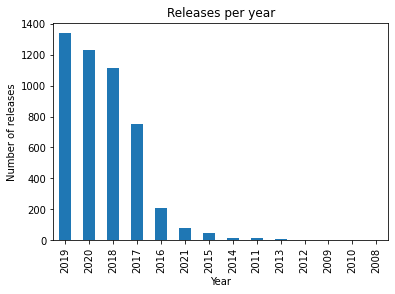

In [21]:
df['Release_Date'].dt.year.value_counts().plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Number of releases")
plt.title("Releases per year")

From the above graph and data, we see 2019 has the highest number of releases, whereas, 2008 the least number of releases.

# Insight 2: How many movies and TV shows are there in the dataset?

In [22]:
df.groupby(['Category'])['Category'].count()

Category
Movie      4673
TV Show     136
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

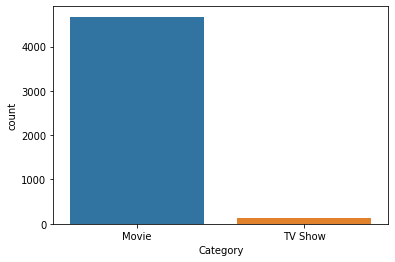

In [23]:
sns.countplot(data=df,x=df['Category'])

We see an overwhelming number of movies in the dataset as compared to TV shows

# Insight 3: Which country has the highest number of movies and TV shows?

In [24]:
count_country=df['Country'].value_counts()
count_country

United States                                                   1654
India                                                            832
United Kingdom                                                   174
Canada                                                           104
Egypt                                                             87
                                                                ... 
United Kingdom, Canada, United States, Cayman Islands              1
Netherlands, Belgium                                               1
United Kingdom, Denmark, Canada, Croatia                           1
Thailand, United States                                            1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: Country, Length: 544, dtype: int64

United States had the highest number of releases

# Insight 4: Show the distribution of censor rating among movies & TV shows?

In [36]:
df['Rating'].value_counts()

TV-MA       1666
TV-14       1133
R            654
TV-PG        413
PG-13        375
PG           238
TV-G          80
TV-Y          71
TV-Y7         69
NR            62
G             38
UR             5
TV-Y7-FV       3
NC-17          2
Name: Rating, dtype: int64

Text(0, 0.5, 'Count')

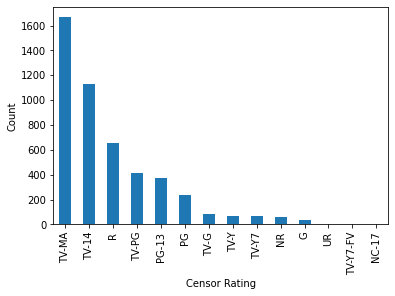

In [38]:
df['Rating'].value_counts().plot(kind='bar')
plt.xlabel("Censor Rating")
plt.ylabel("Count")

# Insight 5: Which country has the highest number of TV shows?

In [31]:
df_TvShows=df.loc[df['Category']=="TV Show"]

In [35]:
df_TvShows.groupby(['Country'])['Country'].count().sort_values(ascending=False)

Country
United States                                                    27
United Kingdom                                                   19
South Korea                                                      10
Japan                                                            10
Spain                                                             7
Taiwan                                                            6
Turkey                                                            5
India                                                             5
Brazil                                                            4
France                                                            3
Canada                                                            3
Thailand                                                          3
Nigeria                                                           3
Denmark                                                           2
Italy                                   

From the data given, United States eems to have the highest number of TV shows followed by United Kingdom

# Insight 6: Among the movies and TV shows released in US, what was the majority censor rating received?

In [25]:
df['Rating'].value_counts()

TV-MA       1666
TV-14       1133
R            654
TV-PG        413
PG-13        375
PG           238
TV-G          80
TV-Y          71
TV-Y7         69
NR            62
G             38
UR             5
TV-Y7-FV       3
NC-17          2
Name: Rating, dtype: int64

In [26]:
df_country=df[df['Country']=='United States']

In [27]:
df_country.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,R,119 min,Dramas,After one of his high school students attacks ...
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,2017-10-20,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,2020-03-19,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...


In [28]:
df_country.groupby(['Rating'])['Rating'].count().sort_values(ascending=False)

Rating
TV-MA       515
R           358
PG-13       221
TV-14       161
PG          140
TV-PG       108
TV-Y         33
TV-G         32
TV-Y7        32
G            28
NR           24
TV-Y7-FV      1
UR            1
Name: Rating, dtype: int64

Among the movies originating in US, majority of them have a 'TV-MA' censor rating

# Insight 7: Which Director/s had the most number of movies/TV shows?

In [45]:
df['Director'].value_counts().sort_values(ascending=False)

Raúl Campos, Jan Suter         18
Marcus Raboy                   15
Jay Karas                      14
Cathy Garcia-Molina            13
Jay Chapman                    12
                               ..
Toka McBaror, Tunde Apalowo     1
Måns Mårlind, Björn Stein       1
Jamie M. Dagg                   1
Bruce McCulloch                 1
Mozez Singh                     1
Name: Director, Length: 3614, dtype: int64

The combination of Raúl Campos, Jan Suter have directed the most number of movies/TV shows together

In [47]:
df_movie=df[df['Category']=="Movie"]
df_movie['Director'].value_counts().sort_values(ascending=False)

Raúl Campos, Jan Suter        18
Jay Karas                     14
Marcus Raboy                  14
Cathy Garcia-Molina           13
Jay Chapman                   12
                              ..
Chi Keung Fung                 1
Grant Heslov                   1
Rocky Soraya, Anggy Umbara     1
Gordon Parks                   1
Mozez Singh                    1
Name: Director, Length: 3507, dtype: int64

The combination of Raúl Campos, Jan Suter have directed the most number of movies together

In [48]:
df_TV=df[df['Category']=="TV Show"]
df_TV['Director'].value_counts().sort_values(ascending=False)

Alastair Fothergill    3
Shin Won-ho            2
Rob Seidenglanz        2
Iginio Straffi         2
Stan Lathan            2
                      ..
Mick Grogan            1
Inma Torrente          1
Carlos Sedes           1
Noam Murro             1
Lee Toland Krieger     1
Name: Director, Length: 130, dtype: int64

Alastair Fothergill has directed the most number of TV Shows

# Insight 8: What is the genre of the movies directed by 'Raúl Campos, Jan Suter'?

In [60]:
df_movie[df_movie['Director']=='Raúl Campos, Jan Suter']['Type']

370     Stand-Up Comedy
568     Stand-Up Comedy
1220    Stand-Up Comedy
1443    Stand-Up Comedy
1602    Stand-Up Comedy
2148    Stand-Up Comedy
3123    Stand-Up Comedy
3805    Stand-Up Comedy
3885    Stand-Up Comedy
4005    Stand-Up Comedy
4415    Stand-Up Comedy
5196    Stand-Up Comedy
5197    Stand-Up Comedy
5198    Stand-Up Comedy
5453    Stand-Up Comedy
5691    Stand-Up Comedy
5692    Stand-Up Comedy
7128    Stand-Up Comedy
Name: Type, dtype: object

All movies directed by this director duo seem to be 'Stand-Up' comdeies

# Insight 9: What is the genre of the movies directed by 'Alastair Fothergill'?

In [63]:
df_TV[df_TV['Director']=='Alastair Fothergill']['Type']

2299    British TV Shows, Docuseries, International TV...
4877    British TV Shows, Docuseries, International TV...
6149    British TV Shows, Docuseries, International TV...
Name: Type, dtype: object

Alastair Fothergill seems ti have a penchant for creating docuseries

# Insight 10: How many movies are listed as 'Thrillers' and 'Comedies'?

In [55]:
df['Type'].map(lambda x:'Thrillers' in x).sum()

481

In [56]:
df['Type'].map(lambda x:'Comedies' in x).sum()

1431

There are more comedies than thrillers in the data